## Copied Contents from environment_2d.py

In [1]:
#!/usr/bin/env python
import numpy as np
import pylab as pl
pl.ion()


class TriangularObstacle(object):
  def __init__(self, x0, y0, x1, y1, x2, y2):
    self.x0 = x0
    self.y0 = y0
    self.x1 = x1
    self.y1 = y1
    self.x2 = x2
    self.y2 = y2

    self.A = np.zeros((3,2))
    self.C = np.zeros(3)

    a = x1 - x0
    b = y1 - y0
    c = x2 - x0
    d = y2 - y0
    if -b*c + a*d > 0:
      self.A[0, :] = -b, a
    else:
      self.A[0, :] = b, -a
    self.C[0] = np.dot(self.A[0, :], np.array([x0,y0]))

    a = x2 - x1
    b = y2 - y1
    c = x0 - x1
    d = y0 - y1
    if -b*c + a*d > 0:
      self.A[1, :] = -b, a
    else:
      self.A[1, :] = b, -a
    self.C[1] = np.dot(self.A[1, :], np.array([x1,y1]))

    a = x0 - x2
    b = y0 - y2
    c = x1 - x2
    d = y1 - y2
    if -b*c + a*d > 0:
      self.A[2, :] = -b, a
    else:
      self.A[2, :] = b, -a
    self.C[2] = np.dot(self.A[2, :], np.array([x2,y2]))


  def contains(self, x, y):
    r = np.dot(self.A, np.array([x,y])) - self.C
    return all([i>0 for i in r])

  def plot(self):
    pl.plot([self.x0,self.x1], [self.y0,self.y1], "r" , linewidth = 2)
    pl.plot([self.x1,self.x2], [self.y1,self.y2], "r" , linewidth = 2)
    pl.plot([self.x2,self.x0], [self.y2,self.y0], "r" , linewidth = 2)        


class Environment(object):
  def __init__(self, size_x, size_y, n_obs):
    self.size_x = size_x
    self.size_y = size_y
    self.obs = []
    for i in range(n_obs):
      x0 = np.random.rand()*size_x
      y0 = np.random.rand()*size_y
      x1 = np.random.rand()*size_x
      y1 = np.random.rand()*size_y
      x2 = np.random.rand()*size_x
      y2 = np.random.rand()*size_y
      self.obs.append(TriangularObstacle(x0, y0, x1, y1, x2, y2))

  def check_collision(self, x, y):
    for ob in self.obs:
      if ob.contains(x, y):
        return True
    return False

  def random_query(self):
    max_attempts = 100
    found_start = False
    found_goal = False
    for i in range(max_attempts):
      x_start = np.random.rand()*self.size_x
      y_start = np.random.rand()*self.size_y
      if not self.check_collision(x_start, y_start):
        found_start = True
        break
    for i in range(max_attempts):
      x_goal = np.random.rand()*self.size_x
      y_goal = np.random.rand()*self.size_y
      if not self.check_collision(x_goal, y_goal):
        found_goal = True
        break
    if found_start and found_goal:
      return x_start, y_start, x_goal, y_goal
    else:
      return None

  def plot(self):
    pl.plot([0, self.size_x, self.size_x, 0, 0], [0, 0, self.size_y, self.size_y, 0], "k", linewidth = 2)
    for ob in self.obs:
      ob.plot()

  def plot_query(self, x_start, y_start, x_goal, y_goal):
    pl.plot([x_start], [y_start], "bs", markersize = 8)
    pl.plot([x_goal], [y_goal], "y*", markersize = 12)


In [2]:
# import
import numpy as np
import pylab as pl
import sys
import math
from scipy.spatial import cKDTree

#sys.path.append('osr_examples/scripts/')
#import environment_2d

## Probabilistic Roadmap (PRM)

In [3]:
def distance(point1,point2):
    return math.sqrt(pow((point1[0]-point2[0]),2) + pow((point1[1]-point2[1]),2))

def path_clear(point1,point2):
    x_step = (point2[0] - point1[0])/20
    y_step = (point2[1] - point1[1])/20
    x1 = point1[0]
    y1 = point1[1]
    for i in range(1,21):
        x = x1 + x_step*i
        y = y1 + y_step*i
        if env.check_collision(x,y):
            return False
    return True

def plot_point(point):
    pl.plot(point[0], point[1], ".", markersize = 4)
    
def plot_edge_green(point1, point2):
    pl.plot([point1[0],point2[0]], [point1[1],point2[1]], "g" , linewidth = 1)

In [4]:
def PRM(sample_size, radius):
    
    sample_space = np.random.rand(sample_size, 2) * np.array([10, 6])  # genarate random sampling points
    
    C_free = []
    
    for i in sample_space:    
        if not env.check_collision(i[0],i[1]):
            C_free.append(i)   # add all points not in obstacle to C_free
            pl.plot(i[0], i[1], ".", markersize = 4, color = "green")   # plot points in obstacle red
        else:
            pl.plot(i[0], i[1], ".", markersize = 4, color = "red")   # plot points not in obstacle green
    
    C_free = np.array(C_free)
    visited = [0] * len(C_free)
    
    kdtree = cKDTree(C_free)   # sort points in KDTree
    
    for i in range(len(C_free)):  # find neighbor points of each point
        neighbor_indices = kdtree.query_ball_point(C_free[i], radius)
        #neighbors = [C_free[j] for j in neighbor_indices]
        
        for j in neighbor_indices:
            if visited[j] == 0 and path_clear(C_free[i],C_free[j]):
                plot_edge_green(C_free[i],C_free[j])
    
        visited[i] = 1

## PRM Default 2D Environment

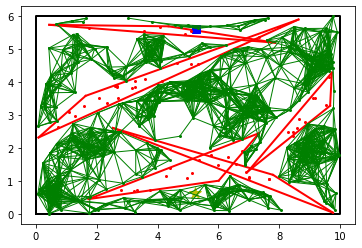

In [5]:
pl.ion()
np.random.seed(4)
#env = environment_2d.Environment(10, 6, 5)
env = Environment(10, 6, 5)
pl.clf()
env.plot()
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)
    
    
# Plot path
sample_size = 400  # sampling density
radius = 1  # connect points within this radius
PRM(sample_size, radius)

## PRM Other Random Seed Value

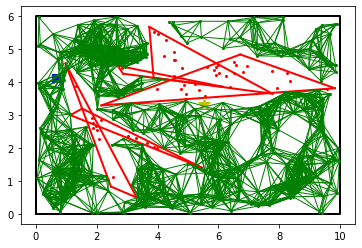

In [6]:
pl.ion()
np.random.seed(19)
env = Environment(10, 6, 5)
pl.clf()
env.plot()
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)
    
    
# Plot path
sample_size = 400  
radius = 1  
PRM(sample_size, radius)

## PRM Search Path

In [7]:
def PRM_search(start, goal, sample_size, radius, threshold):
    
    sample_space = np.random.rand(sample_size, 2) * np.array([10, 6])  # genarate random sampling points
    
    c = [start]
    for i in sample_space:    
        if not env.check_collision(i[0],i[1]):
            c.append(i)   # add all points not in obstacle to c
            pl.plot(i[0], i[1], ".", markersize = 4, color = "green")   # plot points in obstacle red
        else:
            pl.plot(i[0], i[1], ".", markersize = 4, color = "red")   # plot points not in obstacle green
    
    c = np.array(c)
    visited = [0] * len(c)
    kdtree = cKDTree(c)   # sort points in KDTree
    
    s = [0]
    parent = {0:None}  # record parent point of each point
    
    while s:
        current = s[len(s)-1]  # depth-first search
        
        if distance(c[current],goal) <= threshold:  # if point is close enough to goal, goal is found
            path = [goal,c[current]]
            while current in parent:
                current = parent[current]
                path.append(c[current])
            path.reverse()
            return path  # return path from start to goal
        
        adjacent = kdtree.query_ball_point(c[current], radius)
        dist = {}
        
        for i in adjacent:
            if path_clear(c[current],c[i]) and visited[i] == 0:
                if i not in parent:
                    parent[i] = current
                dist[i] = distance(c[i],goal)
                plot_point(c[i])
                plot_edge_green(c[current],c[i])
                
        # greedy search - sort adjacent points in terms of distance
        if dist:
            dist = sorted(dist, key=dist.get)
            s.append(dist[0])
            visited[dist[0]] = 1
        else:
            s.pop()
                
    return None  # if no path found


    
def plot_edge_blue(point1, point2):
    pl.plot([point1[0],point2[0]], [point1[1],point2[1]], "b" , linewidth = 2)
    
def plot_path(path):
    for i in range(1,len(path)-2):
        plot_edge_blue(path[i],path[i+1])
    
def plot_edge_yellow(point1, point2):
    pl.plot([point1[0],point2[0]], [point1[1],point2[1]], "y" , linewidth = 2)
    
def plot_path(path):
    for i in range(1,len(path)-2):
        plot_edge_blue(path[i],path[i+1])

def plot_path_yellow(path):
    for i in range(1,len(path)-2):
        plot_edge_yellow(path[i],path[i+1])


## PRM Search Path Plot

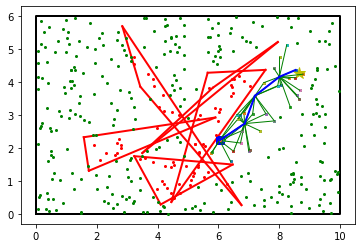

In [8]:
pl.ion()
np.random.seed(51)
env = Environment(10, 6, 5)
pl.clf()
env.plot()
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)
    
    
# Plot path
start = (x_start, y_start)
goal = (x_goal, y_goal)
sample_size = 400  
radius = 1
threshold = 0.5
path = PRM_search(start, goal, sample_size, radius, threshold)
if path:
    plot_path(path)
else:
    print("No path found")
    
# Traversed path marked as green, final path marked as blue

## Post Processing

In [9]:
def post_process(path):
    i = 0
    while i <= len(path)-3:
        p1 = path[i]
        p2 = path[i+1]
        p3 = path[i+2]
        dx1 = (p1[0] - p2[0])/20
        dy1 = (p1[1] - p2[1])/20
        dx2 = (p3[0] - p2[0])/20
        dy2 = (p3[1] - p2[1])/20
        newp1 = p1
        newp2 = p3
        j = 1
        while j<=21 and path_clear(newp1,newp2):
            newp1 = (p2[0] + dx1*j, p2[1] + dy1*j)
            newp2 = (p2[0] + dx2*j, p2[1] + dy2*j)
            j += 1
        newp1 = (newp1[0] - dx1, newp1[1] - dy1)
        newp2 = (newp2[0] - dx2, newp2[1] - dy2)
        if newp1 == p1 and newp2 == p3:
            path.pop(i+1)
        elif newp1 == newp2:
            i += 2
        else:
            path.pop(i+1)
            path.insert(i+1,newp1)
            path.insert(i+2,newp2)
            i = i+2
    return path

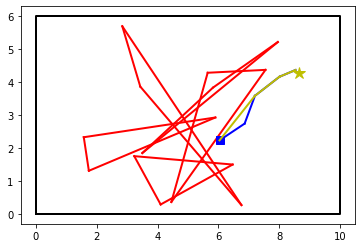

In [10]:
env.plot()
plot_path(path)
env.plot_query(x_start, y_start, x_goal, y_goal)

pathl = []
for i in range(1,len(path)-1):
    pathl.append(path[i].tolist())
pathl[0] = (pathl[0][0],pathl[0][1])
    
path_new = post_process(pathl)
plot_path_yellow(path_new)

# original path marked as blue, processed path marked as yellow

## (Extra) Grid Greedy Search

In [11]:
def grid_search(start, goal, step, threshold):
    s = [start]
    parent = {start:None}  # record parent point of each point
    visited = []
    
    while s:
        current = s[len(s)-1]  # depth-first search
        
        if distance(current,goal) <= threshold:  # if point is close enough to goal, goal is found
            path = [current]
            while current in parent:
                current = parent[current]
                path.append(current)
            path.reverse()
            return path  # return path from start to goal
        
        adjacent = [(current[0] + dx, current[1] + dy) for dx, dy in [(0, step), (step, 0), (0, -step), (-step, 0)]]
        dist = {}
        
        for i in adjacent:
            if 0 <= i[0] < 10 and 0 <= i[1] < 6 and path_clear(current,(i[0],i[1])) and i not in visited:
                if i not in parent:
                    parent[i] = current
                dist[i] = distance(i,goal)
                plot_point(i)
                plot_edge_green(current,i)
                
        # greedy search - sort adjacent points in terms of distance
        if dist:
            dist = sorted(dist, key=dist.get)
            s.append(dist[0])
            visited.append(dist[0])
        else:
            s.pop()
                
    return None  # if no path found




    
def plot_edge_blue(point1, point2):
    pl.plot([point1[0],point2[0]], [point1[1],point2[1]], "b" , linewidth = 2)
    
def plot_edge_yellow(point1, point2):
    pl.plot([point1[0],point2[0]], [point1[1],point2[1]], "y" , linewidth = 2)
    
def plot_path(path):
    for i in range(1,len(path)-2):
        plot_edge_blue(path[i],path[i+1])

def plot_path_yellow(path):
    for i in range(1,len(path)-2):
        plot_edge_yellow(path[i],path[i+1])


## Grid Greedy Search Default 2D Environment

No path found


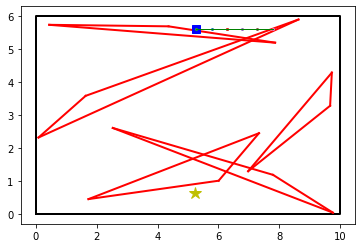

In [12]:
pl.ion()
np.random.seed(4)
#env = environment_2d.Environment(10, 6, 5)
env = Environment(10, 6, 5)
pl.clf()
env.plot()
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)
    
    
    
# Find and plot the path
start = (x_start, y_start)
goal = (x_goal, y_goal)
step = 0.5  # sampling density
threshold = 0.25  # if point is within 0.25 units of goal, consider goal found
path = grid_search(start, goal, step, threshold)

if path:
    plot_path(path)
else:
    print("No path found")
    
    
# Traversed path marked as green, final path marked as blue

## Grid Greedy Search Other Random Seed Value

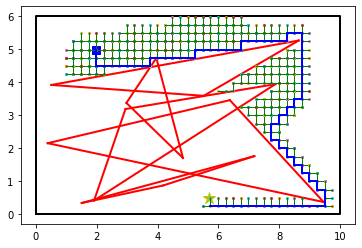

In [13]:
pl.ion()
np.random.seed(17)
env = Environment(10, 6, 5)
pl.clf()
env.plot()
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)
    
    
    
# Find and plot the path
start = (x_start, y_start)
goal = (x_goal, y_goal)
step = 0.25
threshold = 0.25
path = grid_search(start, goal, step, threshold)

if path:
    plot_path(path)
else:
    print("No path found")
    
# Traversed path marked as green, final path marked as blue

## Grid Greedy Search Post Process

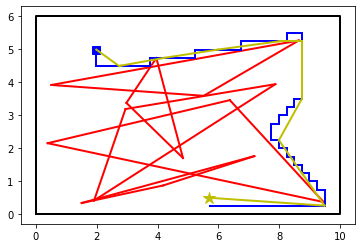

In [14]:
plot_path(path)
env.plot()
env.plot_query(x_start, y_start, x_goal, y_goal)

pathl = []
for i in path:
    if i:
        pathl.append(i)
plot_path(pathl)

path_new = post_process(pathl)
plot_path_yellow(path_new)

pathG = pathl

# original path marked as blue, processed path marked as yellow